# A Gentle Introduction to Machine Learning
## Netflix recommender system
#### March 4, 2020

# Preprocesamiento de datos

Usaremos la librería Pandas
===========================

*Pandas* es una librería de Python que ofrece herramientas para manipulación y análisis de datos de manera efectiva

Las principales caracteristicas de pandas son:
* Importación y exportación de datos
* Exploración de datos
* Manipulación de datos
* Agrupación de datos
 

In [1]:
import pandas as pd
import datetime as dt
from sklearn.model_selection import train_test_split

## Importar datos

In [3]:
# Importar un archivo .csv
print("creando el DataFrame desde el fichero data.csv..")
df = pd.read_csv('~/Descargas/data.csv', names=['movie', 'user','rating','date'])
df.date = pd.to_datetime(df.date)


print('Done..')

creando el DataFrame desde el fichero data.csv..
Done..


## Visualizando un DataFrame

Un DataFrame es una estructura de datos tabular que se compone de columnas y filas ordenadas.

In [4]:
# Mostrando todos los datos
df

,movie,user,rating,date
0,13368,2385003,4,2004-07-08
1,13368,659432,3,2005-03-16
2,13368,751812,2,2002-12-16
3,13368,2625420,2,2004-05-25
4,13368,1650301,1,2005-08-30
...,...,...,...,...
26847518,17770,1790158,4,2005-11-01
26847519,17770,1608708,3,2005-07-19
26847520,17770,234275,1,2004-08-07
26847521,17770,255278,4,2004-05-28


In [5]:
df.columns

Index(['movie', 'user', 'rating', 'date'], dtype='object')

In [6]:
# Conocer el numero de filas de un dataframe
len(df)

26847523

In [7]:
# Presenta las primeras 20 filas de df
df.head(n=20)

,movie,user,rating,date
0,13368,2385003,4,2004-07-08
1,13368,659432,3,2005-03-16
2,13368,751812,2,2002-12-16
3,13368,2625420,2,2004-05-25
4,13368,1650301,1,2005-08-30
5,13368,2269227,4,2005-10-27
6,13368,2220672,4,2002-08-19
7,13368,2500511,4,2003-08-11
8,13368,1452058,2,2005-01-29
9,13368,1624891,3,2002-07-27


In [8]:
# Presenta las últimas 20 filas de df
df.tail(n=20)

,movie,user,rating,date
26847503,17770,1933317,3,2005-12-04
26847504,17770,982006,3,2005-07-05
26847505,17770,111084,2,2003-11-24
26847506,17770,635735,4,2004-12-01
26847507,17770,2167041,4,2005-02-01
26847508,17770,925414,4,2005-02-08
26847509,17770,1983962,2,2005-02-23
26847510,17770,897629,3,2005-04-13
26847511,17770,1274035,4,2005-06-10
26847512,17770,2641559,3,2005-06-27


In [11]:
# Localizar datos especificos por condición
#df.loc[df.date==dt.datetime(2001,9,11)]

movies_june = df.loc[df.date==dt.datetime(2005,6,27)]

In [12]:
movies_june.tail()

,movie,user,rating,date
26845060,17769,552389,3,2005-06-27
26845483,17769,292028,4,2005-06-27
26845995,17769,2558201,2,2005-06-27
26847432,17770,372743,3,2005-06-27
26847512,17770,2641559,3,2005-06-27


In [13]:
# Exportar los datos a un .csv
movies_june.to_csv('~/mis_datos.csv')

# Exploración de datos
* Tipos de datos: int, float, object, datetime

Se puede especificar el tipo de datos para una o mas columnas de un DataFrame, pero es opcional ya que *pandas* puede asignar automaticamente tipos de datos

In [1]:
# Conocer el tipo de datos
df.dtypes?

Object `df.dtypes` not found.


In [15]:
# Anális estadistico de datos

df.describe()

# df.describe(): Hace una descripción solo de datos numéricos en el DataFrame
# count: Número de terminos de la columna 
# mean: Valor promedio de la columna
# std: Desviación standard de la columna
# max, min y ĺimite de las columnas

,movie,user,rating
count,2.684752e+07,2.684752e+07,2.684752e+07
mean,1.553534e+04,1.322528e+06,3.622918e+00
std,1.253161e+03,7.645199e+05,1.079696e+00
min,1.336800e+04,6.000000e+00,1.000000e+00
25%,1.448200e+04,6.612100e+05,3.000000e+00
50%,1.546500e+04,1.319296e+06,4.000000e+00
75%,1.664000e+04,1.984378e+06,4.000000e+00
max,1.777000e+04,2.649429e+06,5.000000e+00


Es importante tener en cuenta que las funciones matemáicas solamente aceptan datos numéricos

In [16]:
# Anális estadistico de datos, incluyendo tipo object
df.describe(include="all")

# top: Valor con mayor número de apariciones
# freq: Número de apariciones de top
# unique: Cantidad de valores únicos, sin repetirlos

,movie,user,rating,date
count,2.684752e+07,2.684752e+07,2.684752e+07,26847523
unique,NaN,NaN,NaN,2182
top,NaN,NaN,NaN,2005-01-19 00:00:00
freq,NaN,NaN,NaN,196836
first,NaN,NaN,NaN,1999-11-11 00:00:00
last,NaN,NaN,NaN,2005-12-31 00:00:00
mean,1.553534e+04,1.322528e+06,3.622918e+00,NaN
std,1.253161e+03,7.645199e+05,1.079696e+00,NaN
min,1.336800e+04,6.000000e+00,1.000000e+00,NaN
25%,1.448200e+04,6.612100e+05,3.000000e+00,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26847523 entries, 0 to 26847522
Data columns (total 4 columns):
movie     int64
user      int64
rating    int64
date      datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 819.3 MB


In [18]:
print("Info ")
print("-"*50)
print("Total No of Users   :", df.user.nunique())
print("Total No of movies  :", df.movie.nunique())


Info 
--------------------------------------------------
Total No of Users   : 475601
Total No of movies  : 4403


In [19]:
sum(df.rating)

97266372

# Manipulación de datos

In [20]:
# Comprobando valores nulos
print("Número de valores nulos en df : ", sum(df.isnull().any()))

Número de valores nulos en df :  0


In [21]:
# Eliminar datos faltantes
df.dropna()

,movie,user,rating,date
0,13368,2385003,4,2004-07-08
1,13368,659432,3,2005-03-16
2,13368,751812,2,2002-12-16
3,13368,2625420,2,2004-05-25
4,13368,1650301,1,2005-08-30
...,...,...,...,...
26847518,17770,1790158,4,2005-11-01
26847519,17770,1608708,3,2005-07-19
26847520,17770,234275,1,2004-08-07
26847521,17770,255278,4,2004-05-28


In [24]:
# Crear nuevas nuevas columnas
df['antiguedad'] = dt.datetime(2020,3,4) - df['date']
df['antiguedad']

In [25]:
df.pop('antiguedad')

0          5718 days
1          5467 days
2          6288 days
3          5762 days
4          5300 days
              ...   
26847518   5237 days
26847519   5342 days
26847520   5688 days
26847521   5759 days
26847522   5473 days
Name: antiguedad, Length: 26847523, dtype: timedelta64[ns]

In [27]:
#Buscar duplicados
df.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
26847518    False
26847519    False
26847520    False
26847521    False
26847522    False
Length: 26847523, dtype: bool

In [28]:
# Eliminar datos duplicados
df.drop_duplicates()

,movie,user,rating,date
0,13368,2385003,4,2004-07-08
1,13368,659432,3,2005-03-16
2,13368,751812,2,2002-12-16
3,13368,2625420,2,2004-05-25
4,13368,1650301,1,2005-08-30
...,...,...,...,...
26847518,17770,1790158,4,2005-11-01
26847519,17770,1608708,3,2005-07-19
26847520,17770,234275,1,2004-08-07
26847521,17770,255278,4,2004-05-28


In [29]:
# Reemplazando valores
df.rating.replace(5, 10, inplace=True)

In [30]:
df.rating.max()

In [31]:
df.rating.replace(10, 5, inplace=True)

# Agregación de datos

In [32]:
# Promedio de rating por usuario

In [33]:
df.groupby('user').rating.mean().reset_index()

,user,rating
0,6,3.405882
1,7,4.030172
2,8,4.214286
3,10,3.479452
4,25,3.375000
...,...,...
475596,2649404,4.000000
475597,2649409,4.062500
475598,2649421,4.000000
475599,2649426,4.075949


# Visualizando con Matplotlib

In [34]:
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [35]:
# method to make y-axis more readable
def human(num, units = 'M'):
    return str(num/10**6) + " M"
   

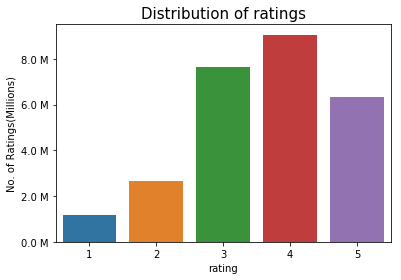

In [36]:
fig, ax = plt.subplots()
plt.title('Distribution of ratings', fontsize=15)
sns.countplot(df.rating)
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings(Millions)')

plt.show()

## Trabajaremos con los 20 usuarios que han calificado más películas

In [37]:
df.user.value_counts().reset_index().head(20)

,index,user
0,305344,4378
1,387418,4310
2,2439493,4126
3,1664010,3908
4,2118461,3688
5,1461435,2449
6,1314869,2414
7,1639792,2382
8,2606799,2289
9,1932594,2220


In [38]:
# Coger 200 lineas que contengam los top 20 usuarios 

In [41]:
small_df = df[df.user.isin(df.user.value_counts().reset_index().head(20)['index'])].tail(200)

In [42]:
small_df.shape

(200, 4)

In [43]:
# Cuántas películas distintas hay en este df?

In [45]:
small_df.movie.nunique()

16

In [38]:
# Cuántos usuarios distintos hay en este df?

In [46]:
small_df.user.nunique()

20

In [47]:
small_df.head()

,movie,user,rating,date
26720624,17755,2118461,4,2005-12-20
26720627,17755,387418,1,2003-11-21
26721564,17756,1001129,2,2005-03-04
26722018,17756,1314869,3,2004-04-13
26722274,17756,2439493,1,2003-05-09


# Dividir data frame en Train y Test

In [48]:
X = small_df[['movie', 'user']]

In [49]:
y = small_df[['rating']]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
train_df = X_train

In [52]:
train_df['rating'] = y_train.rating

/home/patricia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
train_df.head()

,movie,user,rating
26780898,17764,727242,2
26727776,17756,2118461,4
26749660,17762,507603,2
26838079,17766,305344,1
26809258,17764,2606799,3


In [54]:
train_df.shape

(160, 3)

In [55]:
test_df = X_test

In [56]:
test_df['rating'] = y_test.rating

/home/patricia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
test_df.head()

,movie,user,rating
26755874,17762,491531,5
26771888,17763,752642,2
26779249,17764,1001129,3
26730337,17758,727242,1
26735578,17761,507603,1


In [58]:
test_df.shape

(40, 3)

In [59]:
# Sparse matrix de películas y usuarios

In [60]:
# Utilizando pandas pivot

In [61]:
df_movies = train_df.pivot(index='user', columns='movie', values='rating')

In [62]:
df_users = train_df.pivot(index='movie', columns='user', values='rating')

In [63]:
# Similitud de Pearson

In [64]:
pearson_movies = df_movies.corr()

In [65]:
pearson_users = df_users.corr()

In [67]:
pearson_movies

movie,17755,17756,17757,17758,17759,17760,17761,17762,17763,17764,17765,17766,17767,17768,17769,17770
movie,,,,,,,,,,,,,,,,
17755,1.0,NaN,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,1.000000
17756,NaN,1.000000,0.188982,0.772414,0.786456,0.828079,0.850626,0.869964,0.647059,0.320256,0.928571,0.807645,0.845154,0.871421,-0.108465,0.424289
17757,NaN,0.188982,1.000000,0.870864,0.258199,0.707107,0.000000,-0.213201,-0.533114,-0.299425,-0.628539,0.000000,-0.196116,0.265144,-0.157243,NaN
17758,1.0,0.772414,0.870864,1.000000,0.912144,0.617914,0.786141,0.744387,0.617213,0.426401,0.738549,0.708353,0.918780,0.890399,0.486153,0.501767
17759,1.0,0.786456,0.258199,0.912144,1.000000,0.870572,0.888330,0.893819,0.687500,0.521168,NaN,0.808053,0.948683,1.000000,0.258199,0.892218
17760,NaN,0.828079,0.707107,0.617914,0.870572,1.000000,0.626422,0.816223,0.777778,0.678823,NaN,0.854167,0.645179,0.581580,0.869626,0.670820
17761,1.0,0.850626,0.000000,0.786141,0.888330,0.626422,1.000000,0.766419,0.790569,0.487292,NaN,0.550333,0.884652,0.908893,0.699913,0.800129
17762,1.0,0.869964,-0.213201,0.744387,0.893819,0.816223,0.766419,1.000000,0.487950,0.832691,0.816497,0.873897,0.872402,0.766748,0.723339,0.834298
17763,NaN,0.647059,-0.533114,0.617213,0.687500,0.777778,0.790569,0.487950,1.000000,0.562500,NaN,0.612372,NaN,0.000000,0.656532,0.064875
